In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Replace with your dataset path
df = pd.read_csv("F:\\InternShip\\StudentScorePrediction\\StudentPerformanceFactors.csv")

# Preview dataset
print(df.head())



   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
# Check missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [14]:
# Fill numeric columns with mean
for col in df.select_dtypes(include="number").columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_9136\1745181028.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [15]:
# Fill categorical columns with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_9136\3342661432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
print("\nAfter cleaning:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

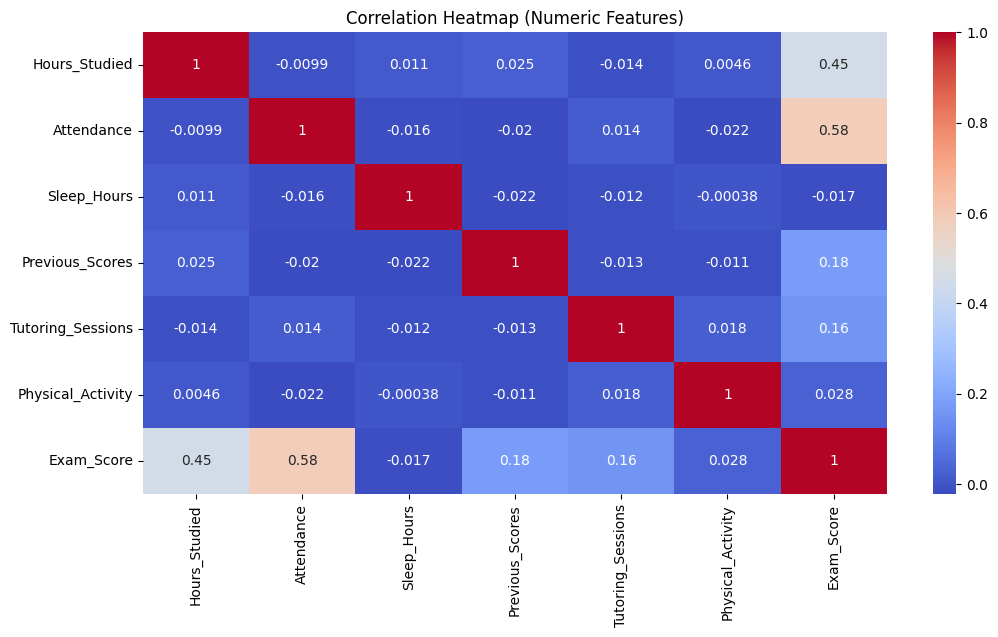

In [18]:

# Correlation heatmap (numeric features only)
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

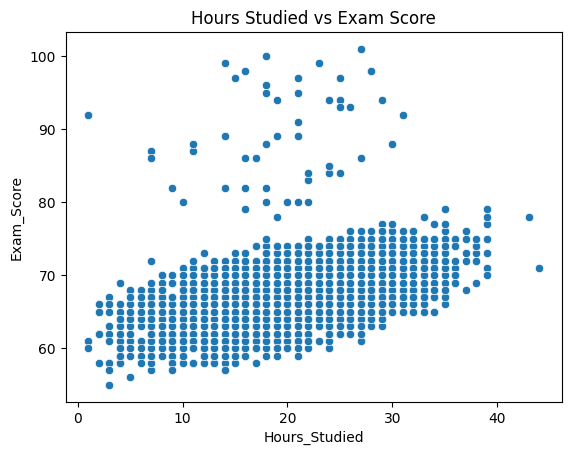

In [19]:
# Scatter plot: Hours studied vs Exam score
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()

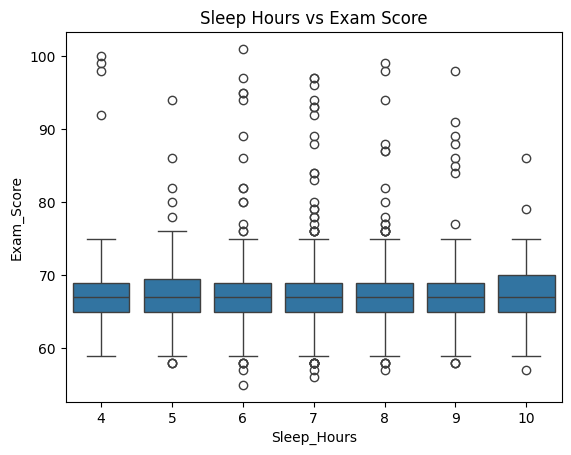

In [20]:
# Boxplot: Sleep hours vs Exam score
sns.boxplot(x="Sleep_Hours", y="Exam_Score", data=df)
plt.title("Sleep Hours vs Exam Score")
plt.show()

In [21]:

# Start simple: only Hours_Studied
X = df[["Hours_Studied"]]
y = df["Exam_Score"]

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [24]:
#  Evaluate Model
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Performance:
MAE: 2.4475687452945643
MSE: 10.85592128879332
R² Score: 0.2319868674542106


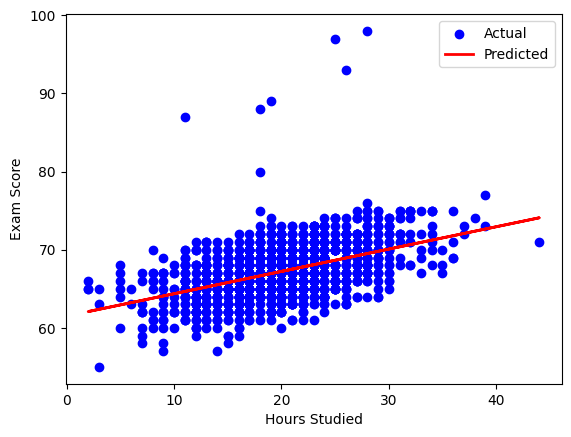

In [25]:
# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [26]:
#  Polynomial Regression 

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)




In [27]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

In [28]:
print("\nPolynomial Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression Performance:
MAE: 2.4447795821288105
MSE: 10.84498813570501
R² Score: 0.23276034442853466


In [30]:
from sklearn.preprocessing import LabelEncoder

# Example for Motivation_Level (Low, Medium, High)
le = LabelEncoder()
df["Motivation_Level"] = le.fit_transform(df["Motivation_Level"])
df["Parental_Involvement"] = le.fit_transform(df["Parental_Involvement"])
df["Internet_Access"] = le.fit_transform(df["Internet_Access"])
df["Gender"] = le.fit_transform(df["Gender"])


In [31]:
# Experiment with Multiple Features
X_multi = df[["Hours_Studied", "Sleep_Hours", "Attendance", "Motivation_Level", "Previous_Scores"]]
y_multi = df["Exam_Score"]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

y_pred_multi = lr_multi.predict(X_test_m)

print("\nMultiple Features Model Performance:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("R² Score:", r2_score(y_test_m, y_pred_multi))



Multiple Features Model Performance:
MAE: 1.3562462297233384
MSE: 5.334587003714135
R² Score: 0.6225992463863976
